## Broden Dataset - General Info

#### Sources:
    - ADE -> scene, object, part
    - Pascal -> object, part
    - OpenSurfaces -> material
    - DTD -> texture
#### Categories:
    - color
    - object
    - part
    - material
    - scene
    - texture
    
#### Files:
    - category.csv (information about each category: 6 categories)
    - index.csv (information about each image: 63305 images)
    - label.csv (information about each label: 1197 labels)
    - c_*(category).csv (information about labels in each category)

#### Structures:
    - Each label is associated with a unique label number (range from 1 to 1197)
    - Each label is also associated with a label code within its categories
    - Each label belongs to one or more categories
    - Some labels have semantic information associated with them
    - Each image in Broden_224 is of size 224 x 224
    - Each image may or may not be associated some labels

## Broden Dataset - Load Data
- fo = FeatureOperator() 
- fo.data is a SegmentationData() object that stores Broden Data

###  fo.data.category

In [ ]:
OrderedDict([('color', OrderedDict([('name', 'color'), ('first', '1'), ('last', '11'), ('count', '11'), ('frequency', '651776')])), 
('object', OrderedDict([('name', 'object'), ('first', '12'), ('last', '1197'), ('count', '584'), ('frequency', '271047')])), 
('part', OrderedDict([('name', 'part'), ('first', '12'), ('last', '1186'), ('count', '234'), ('frequency', '132414')])), 
('scene', OrderedDict([('name', 'scene'), ('first', '59'), ('last', '1179'), ('count', '468'), ('frequency', '17746')])), 
('texture', OrderedDict([('name', 'texture'), ('first', '237'), ('last', '391'), ('count', '47'), ('frequency', '6611')]))])

### fo.data.label[24]:

In [ ]:
{'number': 24, 'name': 'fabric', 'category': {'material': 7056, 'object': 932, 'part': 2}, 
 'frequency': 7990, 'coverage': 689.136189, 'syns': ['textile', 'cloth']}

### fo.data.image[0]:

In [ ]:
{'image': 'opensurfaces/25605.jpg', 'split': 'train', 'ih': 224, 'iw': 224, 'sh': 112, 'sw': 112, 
 'color': ['opensurfaces/25605_color.png'], 'object': [], 'part': [], 'material': ['opensurfaces/25605_material.png'], 
 'scene': [], 'texture': []}

## Broden Dataset - Images

In [1]:
import os
from PIL import Image
from matplotlib import pyplot as plt

In [2]:
DATA_DIRECTORY = '../../../project/rcc/deep_learning_hack/netdissect/broden1_224'

### original image

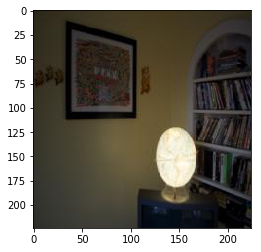

In [63]:
image_path = os.path.join(DATA_DIRECTORY, "images", "opensurfaces/62174.jpg")
image = Image.open(image_path)
plt.imshow(image)

### color

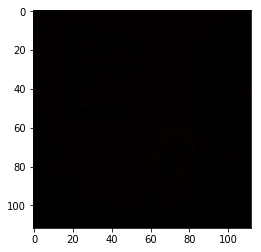

In [66]:
color_image_path = os.path.join(DATA_DIRECTORY, "images", "opensurfaces/62174_color.png")
color_image = Image.open(color_image_path)
plt.imshow(color_image)

In [70]:
# image_color.png stores color category for each pixel
# length = 112 x 112 = 12544
print(list(image.getdata())[9060]) # label number 5 -> green
color_pixel = color_image.load()

(5, 0, 0)


In [78]:
# pinpoint "yellow"
yellow_pixel = [[(255, 255, 0) if color_pixel[i, j] == (9, 0, 0) else (255, 255, 255) for i in range(color_image.size[0])] for j in range(color_image.size[1])]

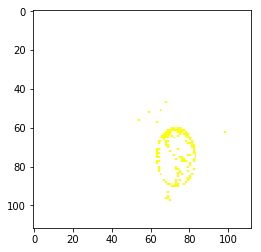

In [79]:
plt.imshow(yellow_pixel)

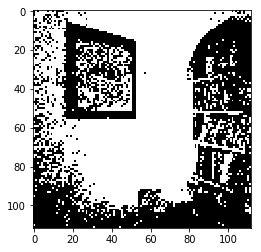

In [80]:
# pinpoint "black"
black_pixel = [[(0, 0, 0) if color_pixel[i, j] == (1, 0, 0) else (255, 255, 255) for i in range(color_image.size[0])] for j in range(color_image.size[1])]
plt.imshow(black_pixel)

In [81]:
# reconstruct the whole picture using color information
color_map = {(1, 0, 0): (0, 0, 0),
            (2, 0, 0): (128, 128, 128),
            (3, 0, 0): (255, 255, 255),
            (4, 0, 0): (128, 64, 0),
            (5, 0, 0): (0, 255, 0),
            (6, 0, 0): (255, 128, 255),
            (7, 0, 0): (64, 0, 128),
            (8, 0, 0): (0, 0, 255),
            (9, 0, 0): (255, 255, 0),
            (10, 0, 0): (255, 0, 0),
            (11, 0, 0): (255, 128, 0)}

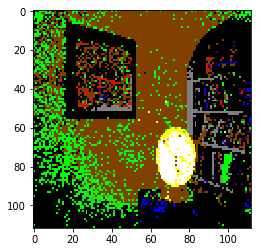

In [88]:
row = color_image.size[0]
column = color_image.size[1]

re_pixel = [[color_map[color_pixel[i, j]] for i in range(row)] for j in range(column)]
plt.imshow(re_pixel)

### material

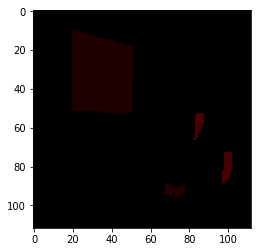

In [40]:
image_path = os.path.join(DATA_DIRECTORY, "images", "opensurfaces/62174_material.png")
image = Image.open(image_path) 
plt.imshow(image)

In [47]:
list(image.getdata())[9060] # label number 71 -> paper (material)

(71, 0, 0)

### original image

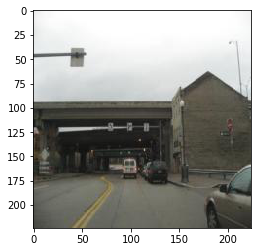

In [13]:
image_path = os.path.join(DATA_DIRECTORY, "images", "ade20k/ADE_val_00001995.jpg")
image = Image.open(image_path) 
plt.imshow(image)

### part

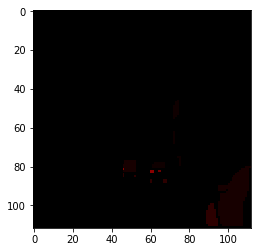

In [17]:
image_path = os.path.join(DATA_DIRECTORY, "images", "ade20k/ADE_val_00001995_part_1.png")
image = Image.open(image_path) 
plt.imshow(image)

In [22]:
list(image.getdata())[9118] # label number 139 -> taillight(part)

(139, 0, 0)

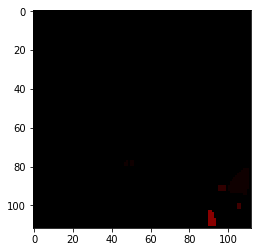

In [24]:
image_path = os.path.join(DATA_DIRECTORY, "images", "ade20k/ADE_val_00001995_part_2.png")
image = Image.open(image_path) 
plt.imshow(image)

In [32]:
parts = set([tup for tup in list(image.getdata()) if tup[0] != 0])
print(parts)

# label number 137 -> rim (part)
# label number 48 -> mirror (part)
# label numebr 64 -> handle (part)
# label number 15 -> windowpane (object, part)
# not sure what the second index stands for

{(137, 0, 0), (48, 0, 0), (64, 0, 0), (15, 0, 0)}


### object

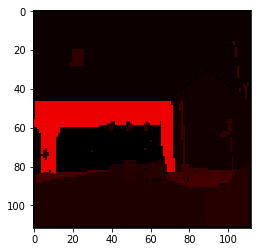

In [33]:
image_path = os.path.join(DATA_DIRECTORY, "images", "ade20k/ADE_val_00001995_object.png")
image = Image.open(image_path) 
plt.imshow(image)

In [35]:
objects = set([tup for tup in list(image.getdata()) if tup[0] != 0])
print(objects)

# label number 12 -> wall (object, part)
# label number 68 -> earth (object)
# label number 18 -> building (object)
# label number 31 -> road (object)
# label number 60 -> streetlight (object)
# label number 57 -> fence (object, part)
# label number 38 -> car (object)
# label number 13 -> sky (object, material)
# label number 47 -> signboard (object, part)
# label number 236 -> bridge (object)

{(12, 0, 0), (68, 0, 0), (18, 0, 0), (31, 0, 0), (60, 0, 0), (57, 0, 0), (38, 0, 0), (13, 0, 0), (47, 0, 0), (236, 0, 0)}


In [56]:
# pinpoint "bridge"
obj_image_path = os.path.join(DATA_DIRECTORY, "images", "ade20k/ADE_val_00001995_object.png")
obj_image = Image.open(obj_image_path) 
obj_pixel = obj_image.load()

bridge_pixel = [[(0, 0, 0) if obj_pixel[i, j] == (236, 0, 0) else (255, 255, 255) for i in range(obj_image.size[0])] for j in range(obj_image.size[1])]

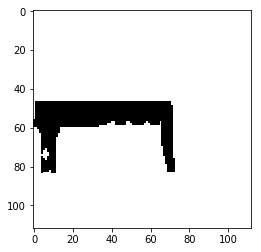

In [57]:
plt.imshow(bridge_pixel)

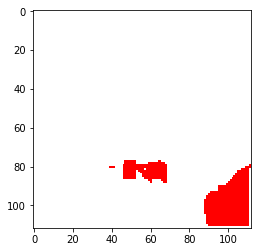

In [60]:
# pinpoint "car"
car_pixel = [[(255, 0, 0) if obj_pixel[i, j] == (38, 0, 0) else (255, 255, 255) for i in range(obj_image.size[0])] for j in range(obj_image.size[1])]
plt.imshow(car_pixel)

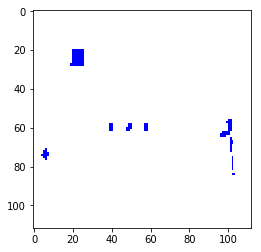

In [62]:
# pinpoint "road"
signboard_pixel = [[(0, 0, 255) if obj_pixel[i, j] == (47, 0, 0) else (255, 255, 255) for i in range(obj_image.size[0])] for j in range(obj_image.size[1])]
plt.imshow(signboard_pixel)

## NetDissect - Feature extraction
- hook features from layer 4 of resnet18
- features is of shape # features to probe (1) x # images x # nodes (512) x 7 x 7
- maxfeatures stores the maximum activation of each node, it is of size # features to probe (1) x # images x # nodes

In [89]:
import numpy as np

In [90]:
MODEL = 'resnet18'  
DATASET = 'places365'
OUTPUT_FOLDER = "../../../project2/bermanm/netdissect/dissection/" + MODEL + "_" + DATASET

In [91]:
# load feature map
maxfeatures = [None] * 1
features = [None] * 1
features_size = [None] * 1
features_size_file = os.path.join(OUTPUT_FOLDER, "feature_size.npy")
mmap_file =  os.path.join(OUTPUT_FOLDER, "%s.mmap" % "layer4")
mmap_max_file = os.path.join(OUTPUT_FOLDER, "%s_max.mmap" % "layer4")
features_size = np.load(features_size_file)
features[0] = np.memmap(mmap_file, dtype=float,mode='r', shape=tuple(features_size[0]))
maxfeatures[0] = np.memmap(mmap_max_file, dtype=float, mode='r', shape=tuple(features_size[0][:2]))

In [92]:
f = features[0]
print("shape of features", f.shape)
mf =maxfeatures[0]
print("shape of maxfeatures", mf.shape)

shape of features (63305, 512, 7, 7)
shape of maxfeatures (63305, 512)


## NetDissect - Threshold
- an activation threshold T_k is computed for each unit k such that P(a_k > T_k) = 0.005 for each k
- thresholds is an 1D array of length 512 (number of units)

In [95]:
# load thresholds
qtpath = os.path.join(OUTPUT_FOLDER, "quantile.npy")
thresholds = np.load(qtpath)

In [97]:
thresholds.shape

(512,)

## NetDissect - Tally
- 

### inputs to tally function are concept maps look as such
- 'color' categorizes each pixel into one of the 11 color categories
- 'object', 'part', 'scene', 'texture' store label number assigned to this particular image
- 'i' is the image index assigned during tally

In [ ]:
{'color': array([[[3, 3, 3, ..., 3, 3, 0],
        [3, 3, 3, ..., 3, 3, 0],
        [8, 8, 8, ..., 3, 3, 0],
        ...,
        [2, 2, 2, ..., 1, 4, 0],
        [2, 2, 2, ..., 2, 2, 0],
        [2, 2, 2, ..., 5, 4, 0]]], dtype=int16), 
 'object': [], 'part': [], 'scene': [], 'texture': [], 
 'sh': 112, 'sw': 112, 'i': 0, 
 'fn': '../../../project/rcc/deep_learning_hack/netdissect/broden1_224/images/opensurfaces/25605.jpg'}

In [98]:
image_path = os.path.join(DATA_DIRECTORY, "images", "opensurfaces/25605.jpg")
image = Image.open(image_path)

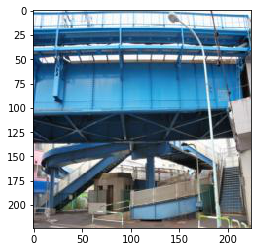

In [5]:
tally_result

[{'unit': 454,
  'category': 'object',
  'label': 'car',
  'score': '0.27031035989056845',
  'color-label': 'red-c',
  'color-truth': '21004512.0',
  'color-activation': '3501729.0',
  'color-intersect': '194719.0',
  'color-iou': '0.008009329897157405',
  'object-label': 'car',
  'object-truth': '5354795.0',
  'object-activation': '3229749.0',
  'object-intersect': '1826712.0',
  'object-iou': '0.27031035989056845',
  'part-label': 'wheel',
  'part-truth': '1513439.0',
  'part-activation': '2658986.0',
  'part-intersect': '112686.0',
  'part-iou': '0.027756956789586718',
  'scene-label': 'auto_showroom-s',
  'scene-truth': '301056.0',
  'scene-activation': '1004210.0',
  'scene-intersect': '56059.0',
  'scene-iou': '0.044875669124492576',
  'texture-label': '',
  'texture-truth': '24924928.0',
  'texture-activation': '99291.0',
  'texture-intersect': '91623.0',
  'texture-iou': '0.003674827924055722'},
 {'unit': 168,
  'category': 'object',
  'label': 'train',
  'score': '0.2687064254

In [6]:
from matplotlib import pyplot as plt
from PIL import Image
import glob

In [14]:
IMAGE_PATH = "../../../project/rcc/deep_learning_hack/netdissect/broden1_224/images/ade20k"

In [10]:
l4image = os.path.join(OUTPUT_FOLDER, "html", "image", "layer4-0148.jpg")

In [11]:
im = Image.open(l4image)

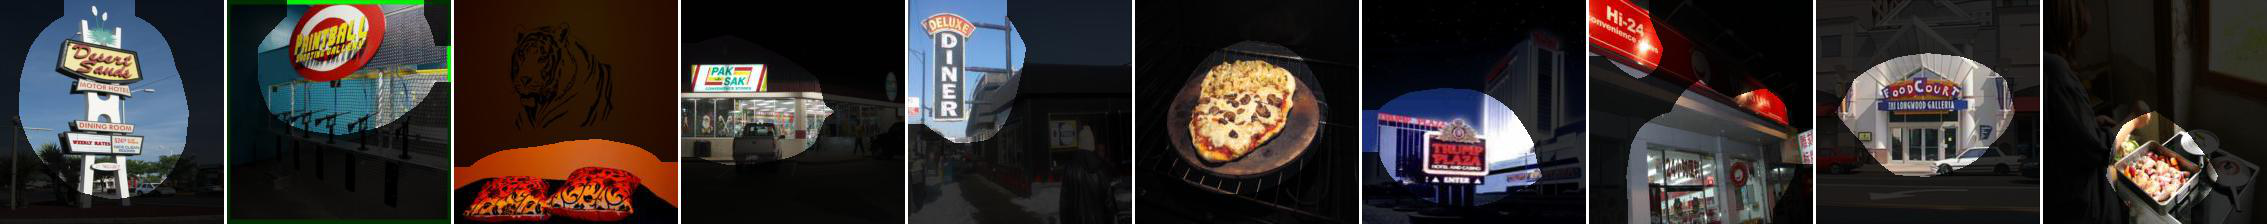

In [12]:
im

In [21]:
ob = os.path.join(IMAGE_PATH, "ADE_train_00016879.jpg")

In [22]:
obim = Image.open(ob)

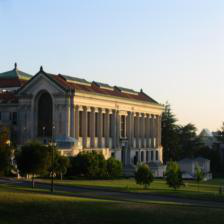

In [23]:
obim